# Importing Libraries for Machine Learning

In [255]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression, LogisticRegression 
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, mean_absolute_error, mean_squared_error
import pandas as pd
import numpy as np

---

In [256]:
df2 = pd.read_csv('df1.csv')

In [257]:
df2.describe

<bound method NDFrame.describe of       Unnamed: 0  index     Motor name  Motor Price   Brand  Engine capacity  \
0              0     59   Honda PCX150       9222.0   honda            153.0   
1              1     60   Honda PCX150       9222.0   honda            153.0   
2              2     61   Honda PCX150       9222.0   honda            153.0   
3              3     62   Honda PCX150       9222.0   honda            153.0   
4              4     63   Honda PCX150       9222.0   honda            153.0   
...          ...    ...            ...          ...     ...              ...   
1862        1862   4109  Yamaha YZF-R7       6000.0  yamaha            689.0   
1863        1863   4110  Yamaha YZF-R7       6000.0  yamaha            689.0   
1864        1864   4111  Yamaha YZF-R7       6000.0  yamaha            689.0   
1865        1865   4112  Yamaha YZF-R7       6000.0  yamaha            689.0   
1866        1866   4113  Yamaha YZF-R7       6000.0  yamaha            689.0   

     

In [258]:
df2.head(2)

,Unnamed: 0,index,Motor name,Motor Price,Brand,Engine capacity,Classification,Vehicle Type,Model,Year,...,Engine cylinder,Engine stroke,Gearbox,Fuel capacity (lts),Transmission type,Front brakes,Rear brakes,Front suspension,Rear suspension,Total
0,0,59,Honda PCX150,9222.0,honda,153.0,Class 2B,Scooters,pcx150,2013,...,Single cylinder,four-stroke,Automatic,6.06,Belt,Single disc,Expanding brake (drum brake),31mm hydraulic fork,"Unit swingarm, 3.1 inches of travel",1
1,1,60,Honda PCX150,9222.0,honda,153.0,Class 2B,Scooters,pcx150,2014,...,Single cylinder,four-stroke,Automatic,6.06,Belt,Single disc,Expanding brake (drum brake),31mm hydraulic fork,"Unit swingarm, 3.1 inches of travel",1


In [259]:
df2.columns

Index(['Unnamed: 0', 'index', 'Motor name', 'Motor Price', 'Brand',
       'Engine capacity', 'Classification', 'Vehicle Type', 'Model', 'Year',
       'Category', 'Power (hp)', 'Engine cylinder', 'Engine stroke', 'Gearbox',
       'Fuel capacity (lts)', 'Transmission type', 'Front brakes',
       'Rear brakes', 'Front suspension', 'Rear suspension', 'Total'],
      dtype='object')

In [260]:
df2.drop(columns=['Unnamed: 0', 'index', 'Engine stroke', 'Total'],inplace=True)

In [261]:
data = pd.get_dummies(df2, columns = ['Motor name','Brand', 'Classification', 'Vehicle Type', 'Model', 'Category', 'Engine cylinder', 'Gearbox', 'Transmission type', 'Front brakes', 'Rear brakes', 'Front suspension', 'Rear suspension'], drop_first = True).drop_duplicates().dropna()
data

,Motor Price,Engine capacity,Year,Power (hp),Fuel capacity (lts),Motor name_Honda CB1100,Motor name_Honda CB1100 EX,Motor name_Honda CB125F,Motor name_Honda CB125R,Motor name_Honda CB1300SA,...,Rear suspension_Unit Swing Arm With 5-way Preload,"Rear suspension_Unit Swing, monoshock","Rear suspension_Unit Swing, twin shocks",Rear suspension_Unit swing,Rear suspension_Unit swing arm,Rear suspension_Unit swingarm,"Rear suspension_Unit swingarm, 3.1 inches of travel","Rear suspension_Öhlins electronic suspension w/ single shock w/piggyback reservoir, 4-way adjustable","Rear suspension_Öhlins single shock, adjustable preload, compression and rebound damping;","Rear suspension_Öhlins® Electronic Racing Suspension single shock, fully adjustable"
0,9222.0,153.0,2013,13.5,6.06,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,9222.0,153.0,2014,13.5,6.06,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,9222.0,153.0,2015,13.5,6.06,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,9222.0,153.0,2016,13.5,6.06,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9222.0,153.0,2017,13.5,6.06,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860,6000.0,998.0,2022,200.0,17.03,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1861,6000.0,689.0,1999,140.0,22.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1862,6000.0,689.0,2000,100.0,23.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1865,6000.0,689.0,2021,0.0,17.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


---

# Data Distribution Analysis

### Getting the X and Y for Train Test Split

In [262]:
X = data.drop(['Motor Price','Year'] , axis=1)
Y = data["Motor Price"]

### Train and Test

In [263]:
# Split into training and test set
# 80% of the input for training and 20% for testing
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 28)

In [264]:
print('Shape of the X_train {}'.format(X_train.shape))
print('Shape of the y_train {}'.format(Y_train.shape))
print('Shape of the X_test {}'.format(X_test.shape))
print('Shape of the y_test {}'.format(Y_test.shape))

Shape of the X_train (1398, 824)
Shape of the y_train (1398,)
Shape of the X_test (350, 824)
Shape of the y_test (350,)


### Train out models

In [265]:
lin_reg = LinearRegression()

In [266]:
lr = lin_reg.fit(X_train,Y_train)
lr

LinearRegression()

In [267]:
Y_pred_lr = lr.predict(X_test)

In [268]:
score_lr = r2_score(Y_test, Y_pred_lr)
score_lr

-1.1728058500256644e+16

---

In [269]:
log_reg = LogisticRegression()

In [270]:
lgr = log_reg.fit(X_train,Y_train)
lgr

/Users/kaseh/opt/anaconda3/envs/lesson1/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [271]:
Y_pred_lgr = lgr.predict(X_test)

In [272]:
score_lgr = r2_score(Y_test, Y_pred_lgr)
score_lgr

-1.492791860006181

___

In [273]:
ridge = Ridge()

In [274]:
rdg = ridge.fit(X_train,Y_train)
rdg

Ridge()

In [275]:
Y_pred_rdg = rdg.predict(X_test)

In [276]:
score_rdg = r2_score(Y_test, Y_pred_rdg)
score_rdg

0.46134415418160835

___

In [277]:
lasso = Lasso()

In [278]:
las = lasso.fit(X_train,Y_train)
las

/Users/kaseh/opt/anaconda3/envs/lesson1/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.832e+10, tolerance: 1.284e+07
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [279]:
Y_pred_las = las.predict(X_test)

In [280]:
score_las = r2_score(Y_test, Y_pred_las)
score_las

0.4481464556272562

---

In [281]:
ran_fr = RandomForestRegressor(n_estimators=60, min_samples_leaf = 3, max_features=0.5, n_jobs=-1, oob_score=True)

In [282]:
rfr = ran_fr.fit(X_train,Y_train)
rfr

RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=60,
                      n_jobs=-1, oob_score=True)

In [283]:
Y_pred_rfr = rfr.predict(X_test)

In [284]:
score_rfr = r2_score(Y_test, Y_pred_rfr)
score_rfr

0.6897176862897711

___

In [285]:
elastic_net = ElasticNet()

In [286]:
e_net = elastic_net.fit(X_train, Y_train)
e_net

ElasticNet()

In [287]:
Y_pred_e_net = e_net.predict(X_test)

In [288]:
score_e_net = r2_score(Y_test, Y_pred_e_net)
score_e_net

0.11953795774152809

___

In [289]:
dectree = DecisionTreeRegressor(max_depth= 6 , max_features= 3, random_state = 233)

In [290]:
dt = dectree.fit(X_train, Y_train)
dt

DecisionTreeRegressor(max_depth=6, max_features=3, random_state=233)

In [291]:
Y_pred_dt = dt.predict(X_test)

In [292]:
score_dt = r2_score(Y_test, Y_pred_dt)
score_dt

0.054372185955253616

---

In [293]:

algorithm = ['Linear Regression','Logistic Regression','Ridge Regression','Lasso Regression','Random Forest Regression','Elastic Net','Decision Tree Regression']
rsquare = [score_lr,score_lgr,score_rdg,score_las,score_rfr,score_e_net,score_dt]
Y_pred = [Y_pred_lr,Y_pred_lgr,Y_pred_rdg,Y_pred_las,Y_pred_rfr,Y_pred_e_net,Y_pred_dt]

In [294]:
evaluation = pd.DataFrame({'Model': algorithm, 'R2 Score': rsquare ,'Y_Pred': Y_pred})

evaluation = evaluation.sort_values(by='R2 Score', ascending=False)
evaluation

,Model,R2 Score,Y_Pred
4,Random Forest Regression,6.897177e-01,"[6351.862262258437, 8574.62091981276, 12291.94..."
2,Ridge Regression,4.613442e-01,"[5874.667235261509, 8352.282146566991, 12223.0..."
3,Lasso Regression,4.481465e-01,"[6087.28882729716, 8290.04835991612, 12163.786..."
5,Elastic Net,1.195380e-01,"[9157.49334934531, 9465.88891089178, 11247.177..."
6,Decision Tree Regression,5.437219e-02,"[10791.047619047618, 10791.047619047618, 14929..."
1,Logistic Regression,-1.492792e+00,"[8800.0, 32000.0, 12000.0, 8800.0, 32000.0, 32..."
0,Linear Regression,-1.172806e+16,"[6553.136474609375, 8364.540771484375, 12217.8..."


# Data Visualisation

Text(0.5, 1.0, 'Multiple Linear Regression Predictions')

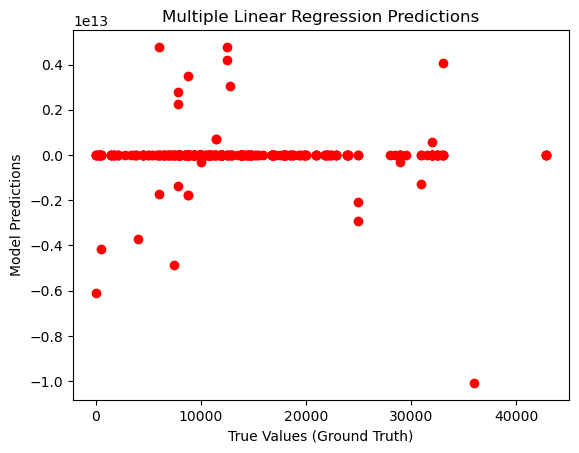

In [295]:
plt.scatter(Y_test, Y_pred_lr, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Linear Regression Predictions')

Text(0.5, 1.0, 'Multiple Logistic Regression Predictions')

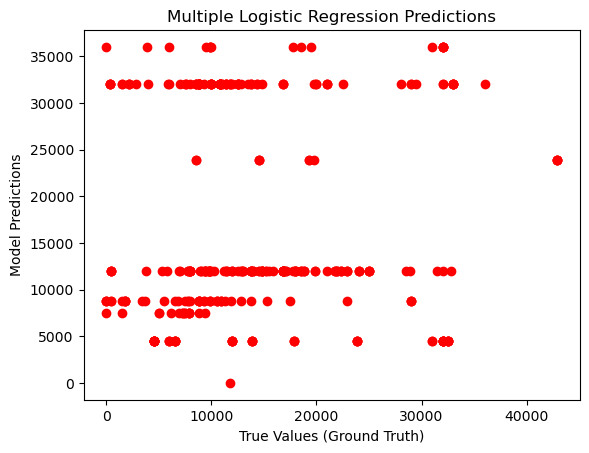

In [296]:
plt.scatter(Y_test, Y_pred_lgr, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Logistic Regression Predictions')

Text(0.5, 1.0, 'Multiple Ridge Regression Predictions')

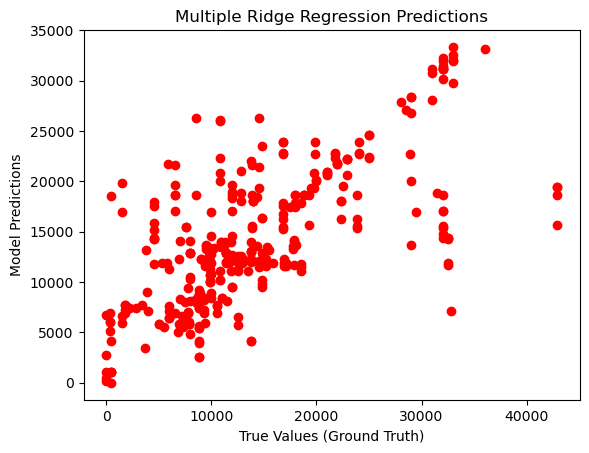

In [297]:
plt.scatter(Y_test, Y_pred_rdg, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Ridge Regression Predictions')

Text(0.5, 1.0, 'Multiple Lasso Regression Predictions')

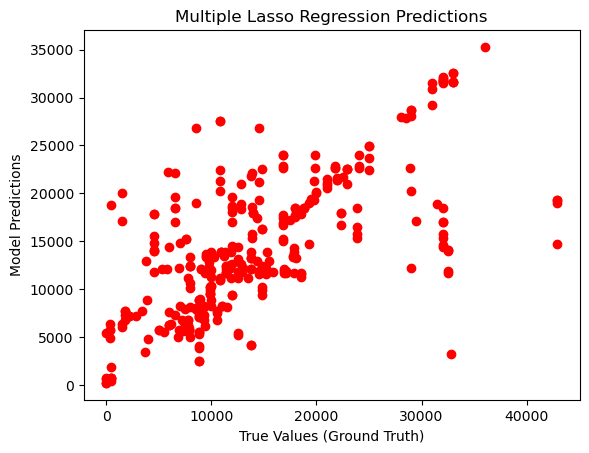

In [298]:
plt.scatter(Y_test, Y_pred_las, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Lasso Regression Predictions')

Text(0.5, 1.0, 'Multiple Random Forest Regression Predictions')

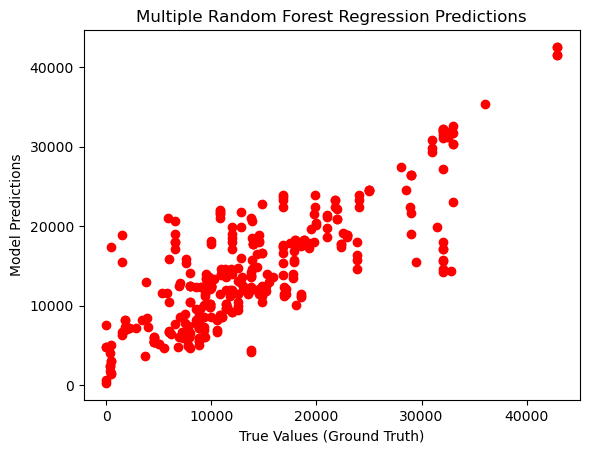

In [299]:
plt.scatter(Y_test, Y_pred_rfr, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Random Forest Regression Predictions')

Text(0.5, 1.0, 'Multiple Elastic Net Regression Predictions')

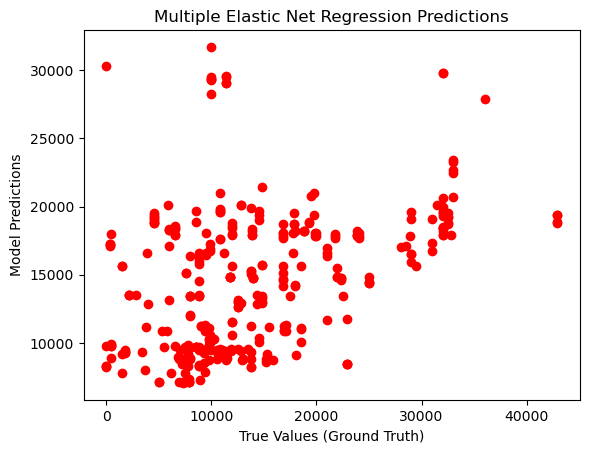

In [300]:
plt.scatter(Y_test, Y_pred_e_net, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Elastic Net Regression Predictions')

Text(0.5, 1.0, 'Multiple Decision Tree Regression Predictions')

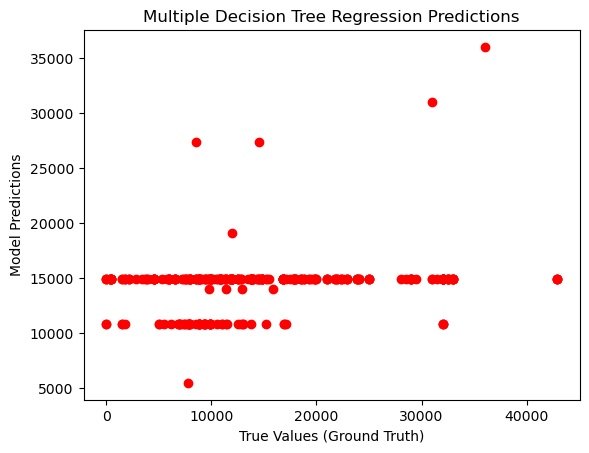

In [301]:
plt.scatter(Y_test, Y_pred_dt, color = 'r')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Decision Tree Regression Predictions')

___

In [302]:
ran_fr1 = RandomForestRegressor(n_estimators=80, min_samples_leaf = 3, max_features=0.5, n_jobs=-1, oob_score=True)
rfr1= ran_fr1.fit(X_train,Y_train)
rfr1

RandomForestRegressor(max_features=0.5, min_samples_leaf=3, n_estimators=80,
                      n_jobs=-1, oob_score=True)

In [303]:

Y_pred_rfr1 = rfr1.predict(X_test)
score_rfr1 = r2_score(Y_test, Y_pred_rfr1)
score_rfr1

0.6908586693913457

Text(0.5, 1.0, 'Multiple Random Forest Regression Predictions')

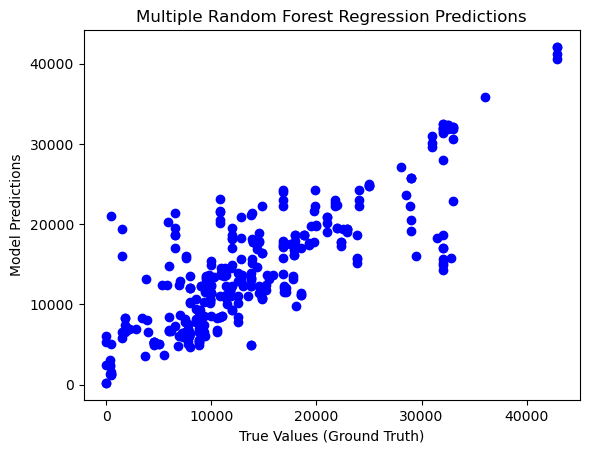

In [338]:
plt.scatter(Y_test, Y_pred_rfr1, color = 'b')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Random Forest Regression Predictions')

Text(0.5, 1.0, 'Multiple Random Forest Regression Predictions')

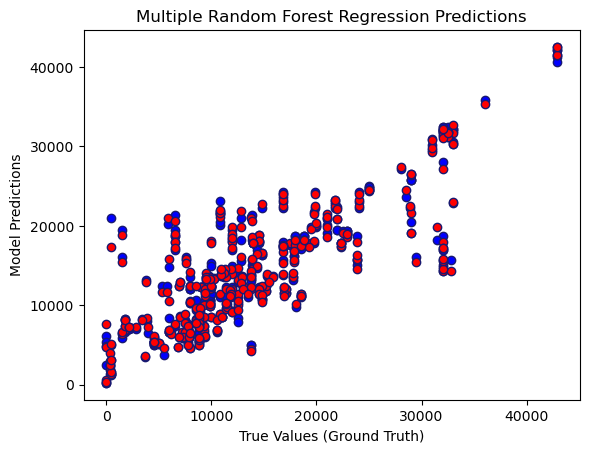

In [353]:
plt.scatter(Y_test, Y_pred_rfr1, color = 'b',edgecolors='midnightblue')
plt.scatter(Y_test, Y_pred_rfr, color = 'r',edgecolors='midnightblue')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Random Forest Regression Predictions')

Text(0.5, 1.0, 'Multiple Random Forest Regression Predictions')

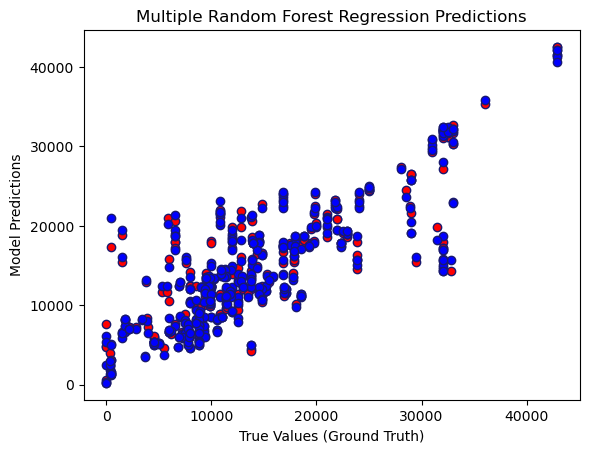

In [341]:
plt.scatter(Y_test, Y_pred_rfr, color = 'r',edgecolors='midnightblue')
plt.scatter(Y_test, Y_pred_rfr1, color = 'b',edgecolors='midnightblue')

plt.ylabel('Model Predictions')
plt.xlabel('True Values (Ground Truth)')
plt.title('Multiple Random Forest Regression Predictions')

___

# Data Hyperparameter Tuning

In [308]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint as sp_randint

In [309]:
df2.head(2)

,Motor name,Motor Price,Brand,Engine capacity,Classification,Vehicle Type,Model,Year,Category,Power (hp),Engine cylinder,Gearbox,Fuel capacity (lts),Transmission type,Front brakes,Rear brakes,Front suspension,Rear suspension
0,Honda PCX150,9222.0,honda,153.0,Class 2B,Scooters,pcx150,2013,Scooter,13.5,Single cylinder,Automatic,6.06,Belt,Single disc,Expanding brake (drum brake),31mm hydraulic fork,"Unit swingarm, 3.1 inches of travel"
1,Honda PCX150,9222.0,honda,153.0,Class 2B,Scooters,pcx150,2014,Scooter,13.5,Single cylinder,Automatic,6.06,Belt,Single disc,Expanding brake (drum brake),31mm hydraulic fork,"Unit swingarm, 3.1 inches of travel"


In [310]:
X = data.drop(['Motor Price','Year'] , axis=1)
Y = data["Motor Price"]

In [311]:
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2, random_state = 28)

StandardScaler is used to remove the outliners and scale the data by making the mean of the data 0 and standard deviation as 1. So we are creating an object std_scl to use standardScaler.

In [312]:
sc = StandardScaler()

scaled_X_train = sc.fit_transform(X_train)
X_train = pd.DataFrame(scaled_X_train, columns= X_train.columns)

X_train.head(2)

,Engine capacity,Power (hp),Fuel capacity (lts),Motor name_Honda CB1100,Motor name_Honda CB1100 EX,Motor name_Honda CB125F,Motor name_Honda CB125R,Motor name_Honda CB1300SA,Motor name_Honda CB200X,Motor name_Honda CB400F,...,Rear suspension_Unit Swing Arm With 5-way Preload,"Rear suspension_Unit Swing, monoshock","Rear suspension_Unit Swing, twin shocks",Rear suspension_Unit swing,Rear suspension_Unit swing arm,Rear suspension_Unit swingarm,"Rear suspension_Unit swingarm, 3.1 inches of travel","Rear suspension_Öhlins electronic suspension w/ single shock w/piggyback reservoir, 4-way adjustable","Rear suspension_Öhlins single shock, adjustable preload, compression and rebound damping;","Rear suspension_Öhlins® Electronic Racing Suspension single shock, fully adjustable"
0,-1.164321,-0.793264,-0.523232,-0.046374,-0.046374,-0.065653,-0.065653,-0.037851,-0.037851,-0.053567,...,-0.053567,-0.104144,-0.053567,-0.053567,-0.026755,-0.046374,-0.129334,-0.053567,-0.037851,-0.026755
1,-0.530490,-0.390387,0.170123,-0.046374,-0.046374,-0.065653,-0.065653,-0.037851,-0.037851,-0.053567,...,-0.053567,-0.104144,-0.053567,-0.053567,-0.026755,-0.046374,-0.129334,-0.053567,-0.037851,-0.026755


In [313]:
X_test = pd.get_dummies(X_test, drop_first = True)

scaled_X_test = sc.fit_transform(X_test)
X_test = pd.DataFrame(scaled_X_test, columns= X_test.columns)

X_test.head(2)

,Engine capacity,Power (hp),Fuel capacity (lts),Motor name_Honda CB1100,Motor name_Honda CB1100 EX,Motor name_Honda CB125F,Motor name_Honda CB125R,Motor name_Honda CB1300SA,Motor name_Honda CB200X,Motor name_Honda CB400F,...,Rear suspension_Unit Swing Arm With 5-way Preload,"Rear suspension_Unit Swing, monoshock","Rear suspension_Unit Swing, twin shocks",Rear suspension_Unit swing,Rear suspension_Unit swing arm,Rear suspension_Unit swingarm,"Rear suspension_Unit swingarm, 3.1 inches of travel","Rear suspension_Öhlins electronic suspension w/ single shock w/piggyback reservoir, 4-way adjustable","Rear suspension_Öhlins single shock, adjustable preload, compression and rebound damping;","Rear suspension_Öhlins® Electronic Racing Suspension single shock, fully adjustable"
0,-1.121105,-0.936987,-1.325804,-0.07581,-0.07581,0.0,0.0,0.0,0.0,-0.07581,...,-0.053529,-0.120386,-0.07581,-0.053529,-0.07581,-0.053529,-0.142857,-0.07581,0.0,-0.053529
1,-1.195373,-0.925638,-2.308573,-0.07581,-0.07581,0.0,0.0,0.0,0.0,-0.07581,...,-0.053529,-0.120386,-0.07581,-0.053529,-0.07581,-0.053529,-0.142857,-0.07581,0.0,-0.053529


---

RFR & GSCV

In [342]:
parameters_gscv = {'n_estimators': [100,200,300],'max_depth': [5,7,9]}
rfr = RandomForestRegressor(n_estimators=80, min_samples_leaf = 3, max_features=0.5, n_jobs=-1, oob_score=True)

In [343]:
rfr_gscv = GridSearchCV(rfr, parameters_gscv)
rfr_gscv.fit(X_train, Y_train)

GridSearchCV(estimator=RandomForestRegressor(max_features=0.5,
                                             min_samples_leaf=3,
                                             n_estimators=80, n_jobs=-1,
                                             oob_score=True),
             param_grid={'max_depth': [5, 7, 9],
                         'n_estimators': [100, 200, 300]})

In [344]:
Y_pred_rfr_gscv_train = rfr_gscv.predict(X_train)

In [345]:
print(rfr_gscv.best_params_)

{'max_depth': 9, 'n_estimators': 300}


In [354]:
r2_score(Y_train, Y_pred_rfr_gscv_train)

0.7369348118492023

In [346]:
(r2_score(Y_train, Y_pred_rfr_gscv_train)*100).round()

74.0

___

RFR & RSCV

In [348]:
parameters_rscv = {"max_depth": [3,10],
              "max_features": sp_randint(1, X_train.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True],
              "n_estimators": sp_randint(100, 500)}

rfr = RandomForestRegressor(n_estimators=80, min_samples_leaf = 3, max_features=0.5, n_jobs=-1, oob_score=True)

In [349]:
rfr_rscv = RandomizedSearchCV(rfr, parameters_rscv ,n_iter=10, cv=5, random_state=42)
rfr_rscv.fit(X_train, Y_train)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=0.5,
                                                   min_samples_leaf=3,
                                                   n_estimators=80, n_jobs=-1,
                                                   oob_score=True),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 10],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8e102b3550>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8e102c2bb0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8e102b3f70>},
                   random_state=42)

In [350]:
Y_pred_rfr_rscv_train = rfr_rscv.predict(X_train)

In [351]:
print(rfr_rscv.best_params_)

{'bootstrap': True, 'max_depth': 10, 'max_features': 664, 'min_samples_split': 4, 'n_estimators': 249}


In [355]:
r2_score(Y_train, Y_pred_rfr_rscv_train)

0.7571842701063927

In [352]:
(r2_score(Y_train, Y_pred_rfr_rscv_train)*100).round()

76.0

___

Y_TEST

In [347]:
parameters_rscv = {"max_depth": [3,10],
              "max_features": sp_randint(1, X_test.shape[1]),
              "min_samples_split": sp_randint(2, 11),
              "bootstrap": [True],
              "n_estimators": sp_randint(100, 500)}

rfr = RandomForestRegressor(n_estimators=80, min_samples_leaf = 3, max_features=0.5, n_jobs=-1, oob_score=True)

In [325]:
rfr_rscv = RandomizedSearchCV(rfr, parameters_rscv ,n_iter=10, cv=5, random_state=42)
rfr_rscv.fit(X_test, Y_test)

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(max_features=0.5,
                                                   min_samples_leaf=3,
                                                   n_estimators=60, n_jobs=-1,
                                                   oob_score=True),
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [3, 10],
                                        'max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8e1023baf0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8e10fd9ca0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7f8e1023be80>},
                   random_state=42)

In [326]:
Y_pred_rfr_rscv_test = rfr_rscv.predict(X_test)

In [327]:
mean_squared_error(Y_test, Y_pred_rfr_rscv_test)

20068072.668873265

In [328]:
mean_absolute_error(Y_test,Y_pred_rfr_rscv_test)

3236.509718707003

In [329]:
results = pd.DataFrame(zip(Y_test, Y_pred_rfr_rscv_test, Y_test - Y_pred_rfr_rscv_test), columns = ['Y_test', 'Y_pred', 'error'])
results.head(10)

,Y_test,Y_pred,error
0,1500.0,7183.609015,-5683.609015
1,11000.0,10001.610185,998.389815
2,9000.0,11756.319463,-2756.319463
3,9300.0,7446.632420,1853.367580
4,350.0,3908.372215,-3558.372215
5,11820.0,12454.003411,-634.003411
6,32000.0,30298.274003,1701.725997
7,6800.0,8481.933265,-1681.933265
8,13800.0,13731.309808,68.690192
9,21000.0,18169.643139,2830.356861


<AxesSubplot: >

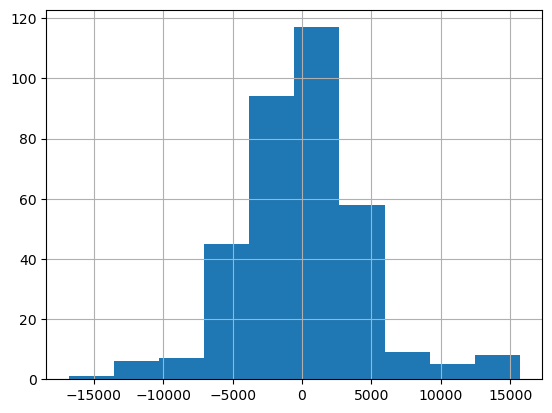

In [330]:
results['error'].hist()

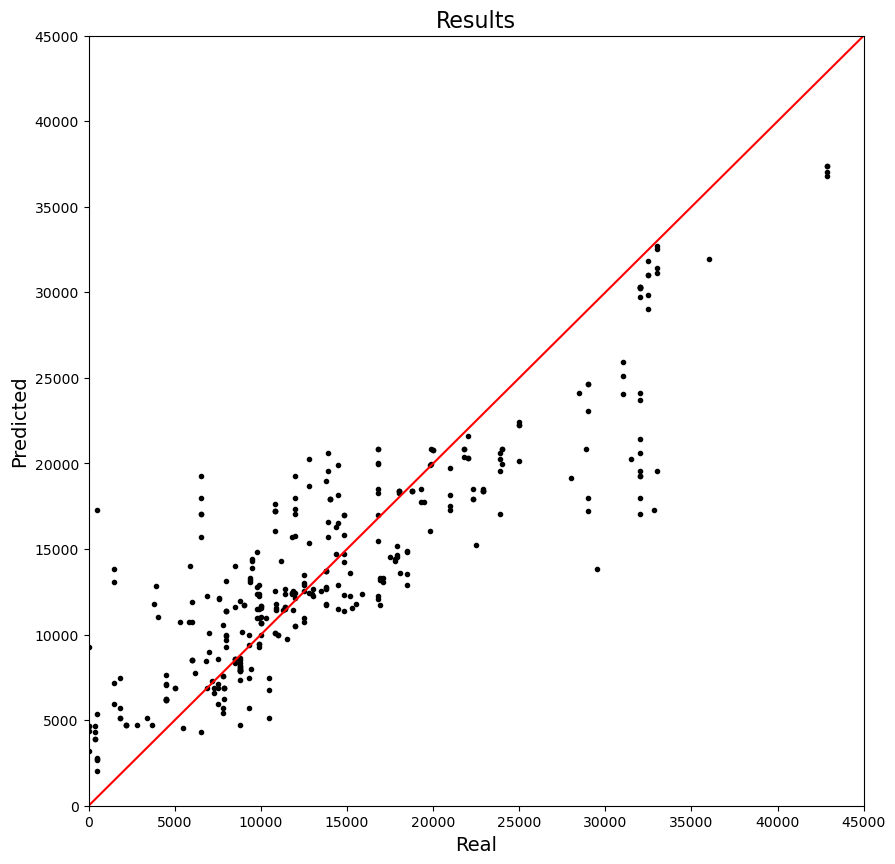

In [331]:
plt.figure(figsize=(10,10))
x=np.linspace(0,45000,45000)
plt.plot(results['Y_test'], results['Y_pred'], 'k.')
plt.plot(x, x, 'r-')
plt.xlim(0,45000)
plt.ylim(0,45000)
plt.title("Results", fontsize=16)
plt.xlabel("Real", fontsize=14)
plt.ylabel("Predicted", fontsize=14)
plt.savefig("Results.png")
plt.show()

In [332]:
print(f"{(r2_score(Y_test, Y_pred_rfr_rscv_test)*100).round()}%") 


75.0%


In [356]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Y_test, Y_pred_rfr_rscv_test))
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_pred_rfr_rscv_test))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Y_test, Y_pred_rfr_rscv_test)))

Mean Absolute Error: 3236.509718707003
Mean Squared Error: 20068072.668873265
Root Mean Squared Error: 4479.740245692072


In [335]:
# Calculate the absolute errors
errors = abs(Y_pred_rfr_rscv_test - Y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / Y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')


Mean Absolute Error: 3236.51 degrees.
Accuracy: -inf %.


/Users/kaseh/opt/anaconda3/envs/lesson1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/Users/kaseh/opt/anaconda3/envs/lesson1/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


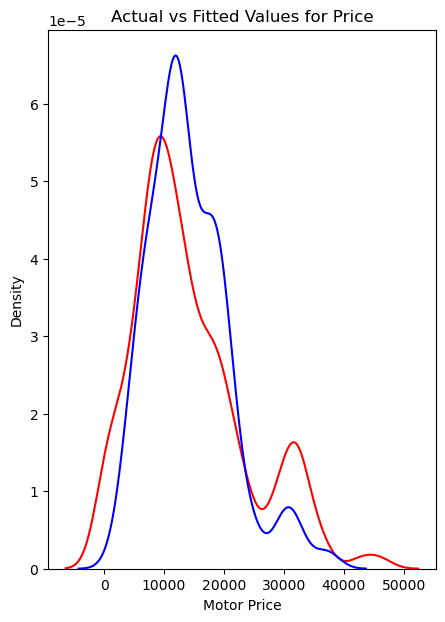

In [357]:
plt.figure(figsize=(5, 7))


ax = sns.distplot(Y, hist=False, color="r", label="Actual Value")
sns.distplot(Y_pred_rfr_rscv_test, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Price')


plt.show()
plt.close()

That's the end of Data Machine Learning